# BOX-KDS

In [1]:
import openmc
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import kdsource as kds
from mpl_toolkits.mplot3d import Axes3D as ax


### PARAMETROS DE GEOMETRIAS


In [2]:

#bloque mat01
W =5.0 #semi-ancho
H =5.0 #semi-alto
L =1.0 #largo 

#bloque donde quiero ver la lista de particulas
angle = math.radians(30)

### Creacion de Planos

##### <span style="color:cyan">Separacion por filtros de los planos</span>

In [3]:
# e = 0.0001*L 
# rot = [0,0,0] #angulos de la matriz de rotacion

#SEPARO POR PLANOS

##plano a la salida del cubo de agua
Plano_1 = kds.surfsource.SurfaceSourceFile('surface_source.h5') #,domain={'z':[0,L+e]})
Plano_1.save_source_file("surfsource_1.mcpl")


##Plano inclinado
# Plano_2 = kds.surfsource.SurfaceSourceFile('surface_source.h5',domain={'z':[L+e,20*L]},set_domain_first=True)
# Plano_2.save_source_file('Plano_2.h5')


#Plano donde quiero comparar los metodos despues.
# Plano_3 = kds.surfsource.SurfaceSourceFile('surface_source.h5',domain={'z':[49*L,np.inf]},set_domain_first=True)
# Plano_3.save_source_file('Plano_3.h5')


Number of particles in file surface_source.h5: 2562839
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Saving into MCPL format
Saving into SSV format (ASCII)
Done, saved into temp.txt file
ssv_open_file: Opened file "temp.txt":
MCPL: Attempting to compress file surfsource_1.mcpl with gzip
MCPL: Succesfully compressed file into surfsource_1.mcpl.gz
Created surfsource_1.mcpl.gz
Done, saved into surfsource_1.mcpl file


# KDSource

##### <span style="color:cyan">Generacion de metricas, lista de particulas y KDSource</span>

In [4]:

#chekear como convierte a .mcpl y como accede a .h5
plist_1 = kds.PList("surfsource_1.mcpl.gz")
# plist_2 = kds.PList("surfsource_2.mcpl.gz")
#la verdad aca tengo dudas pero bueno
geom = kds.Geometry([kds.geom.Energy(),kds.geom.SurfXY(xmin=-W,xmax=W,ymin=-H,ymax=H),kds.geom.Isotrop()])

S_1 = kds.KDSource(plist_1,geom)
# S_2 = kds.KDSource(plist_2,geom)

Using existing file surfsource_1.mcpl.gz
sum_weights = 2562839.0
p2 = 2562839.0
N = 2562839
N_eff = 2562839.0


##### <span style="color:cyan">OPTIMIZE BANDWITH</span>

In [5]:
var_importance = [5,1,1,1,1,1]

parts,ws = S_1.plist.get(N=-1)
scaling = S_1.geom.std(parts=parts)
scaling /= var_importance

# Number of particles to use for optimization.
# A large number (1E5 or more) gives better bandwidths, but takes longer to
# compute.
N = 1E5

Using 100000 particles for fit.
Calculating bw ... 
Done
Optimal bw (silv) = [[2.16063548e-07 5.61699169e-01 5.61584465e-01 9.14157909e-03
  9.14157909e-03 9.14157909e-03]]
Using 100000 particles for fit.
Calculating bw ... 
Using k = 10 neighbors per batch (batch_size = 10000)
Correction factor: f_k = k_float / k = 1.0
Effective total neighbors: K_eff = 100.0
batch = 1 / 10
batch = 2 / 10
batch = 3 / 10
batch = 4 / 10
batch = 5 / 10
batch = 6 / 10
batch = 7 / 10
batch = 8 / 10
batch = 9 / 10
batch = 10 / 10
Done
Optimal bw (knn) = [[5.45185489e-07 1.41731560e+00 1.41702617e+00 2.30666224e-02
  2.30666224e-02 2.30666224e-02]
 [3.94182343e-07 1.02475358e+00 1.02454432e+00 1.66777279e-02
  1.66777279e-02 1.66777279e-02]
 [1.17518997e-07 3.05513464e-01 3.05451075e-01 4.97219090e-03
  4.97219090e-03 4.97219090e-03]
 ...
 [3.09677717e-07 8.05067389e-01 8.04902988e-01 1.31023644e-02
  1.31023644e-02 1.31023644e-02]
 [5.20191739e-07 1.35233949e+00 1.35206333e+00 2.20091449e-02
  2.20091449e-0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.7min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.9min remaining:   48.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.5min finished


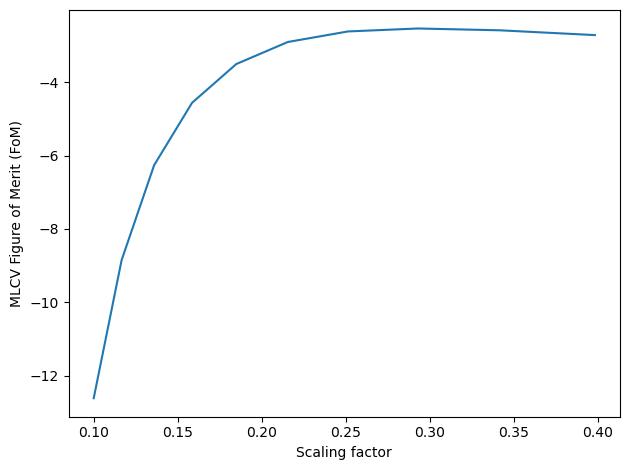

Done
Optimal bw (mlcv) = [[1.59665452e-07 4.15081362e-01 4.14996599e-01 6.75539384e-03
  6.75539384e-03 6.75539384e-03]
 [1.15441998e-07 3.00113901e-01 3.00052615e-01 4.88431373e-03
  4.88431373e-03 4.88431373e-03]
 [3.44171371e-08 8.94740345e-02 8.94557632e-02 1.45617798e-03
  1.45617798e-03 1.45617798e-03]
 ...
 [2.96345121e-08 7.70406717e-02 7.70249394e-02 1.25382666e-03
  1.25382666e-03 1.25382666e-03]
 [8.84628329e-08 2.29976321e-01 2.29929358e-01 3.74283396e-03
  3.74283396e-03 3.74283396e-03]
 [2.92261442e-08 7.59790398e-02 7.59635243e-02 1.23654874e-03
  1.23654874e-03 1.23654874e-03]]
Using 100000 particles for fit.


In [6]:
S_1.bw_method = "silv"
S_1.fit(N, scaling=scaling)

# Method 3: Adaptive Maximum Likelihood Cross-Validation:
# Creates a grid of adaptive bandwidths and evaluates the
# cross-validation scores on each one, which is an indicator of the
# quality of the estimation. Selects the bandwidth that optimizes
# CV score.
# kNN is used to generate the seed adaptive bandwidth.

# kNN bandwidth
S_1.bw_method = "knn"
batch_size = 10000 # Batch size for KNN search
k = 10             # Numer of neighbors per batch
S_1.fit(N, scaling=scaling, batch_size=batch_size, k=k)
bw_knn = S_1.kde.bw

# MLCV optimization of previously calculated kNN bandwidth
S_1.bw_method = "mlcv"
N_cv = int(1E4)   # Use a smaller N to reduce computation times
seed = bw_knn[:N_cv] # Use kNN BW as seed (first N elements)
grid = np.logspace(-1,-0.4,10)
S_1.fit(N_cv, scaling=scaling, seed=seed, grid=grid)
bw_cv = S_1.kde.bw

# Extend MLCV optimization to full KNN BW
bw_knn_cv = bw_knn * bw_cv[0]/bw_knn[0] # Apply MLCV factor
dim = S_1.geom.dim
bw_knn_cv *= kds.bw_silv(dim,len(bw_knn))/kds.bw_silv(dim,len(bw_cv)) # Apply Silverman factor
S_1 = kds.KDSource(plist_1, geom, bw=bw_knn_cv) # Create new KDSource with full BW
S_1.fit(N=N, scaling=scaling)

#### Resampleo de fuente

In [7]:
xmlfile = "Source_1.xml"

S_1.save(xmlfile)

N_resampled = 5E6

Bandwidth file: surfsource_1_bws
Successfully saved parameters file Source_1.xml


In [8]:
!kdtool resample "$xmlfile" -o "resampled_1" -n $N_resampled
resampled = "resampled_1.mcpl.gz" 

Reading xmlfile Source_1.xml...
Done.
Resampling...
MCPL: Attempting to compress file resampled_1.mcpl with gzip
MCPL: Succesfully compressed file into resampled_1.mcpl.gz
Successfully sampled 5000000 particles.


#### Guardo la nueva fuente en formato HDF5

In [9]:
Plano_resampled_1 = kds.surfsource.SurfaceSourceFile('resampled_1.mcpl.gz')

Number of particles in file resampled_1.mcpl.gz: 5000000
100% n, 0% g, 0% e-, 0% e+, 0% p, 


In [10]:
Plano_resampled_1.save_source_file('plano_1_resampled.h5')

Saving into OpenMC format (HDF5)
Done, saved into plano_1_resampled.h5 file


In [11]:
# # #OPTIMIZE BANDWITH
# var_importance = [3,1,1,1,1,1]

# parts,ws = S_2.plist.get(N=-1)
# scaling = S_2.geom.std(parts=parts)
# scaling /= var_importance

# # Number of particles to use for optimization.
# # A large number (1E5 or more) gives better bandwidths, but takes longer to
# # compute.
# N = 1E5


# S_2.bw_method = "silv"
# S_2.fit(N, scaling=scaling)

# xmlfile = "Source_2.xml"

# S_2.save(xmlfile)

# N_resampled = 1E6

# !kdtool resample "$xmlfile" -o "resampled_2" -n $N_resampled
# resampled_2 = "resampled_2.mcpl.gz"

# Plano_resampled_2 = kds.surfsource.SurfaceSourceFile('resampled_2.mcpl.gz')
# Plano_resampled_2.save_source_file('plano_2_resampled.h5')